In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import pearsonr
from IPython.display import display

In [2]:
file_path = r".\data\Spotify_Youtube.csv"
df = pd.read_csv(file_path)

In [3]:
df.head()

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,...,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,...,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08


In [4]:
df.columns

Index(['Unnamed: 0', 'Artist', 'Url_spotify', 'Track', 'Album', 'Album_type',
       'Uri', 'Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
       'Duration_ms', 'Url_youtube', 'Title', 'Channel', 'Views', 'Likes',
       'Comments', 'Description', 'Licensed', 'official_video', 'Stream'],
      dtype='object')

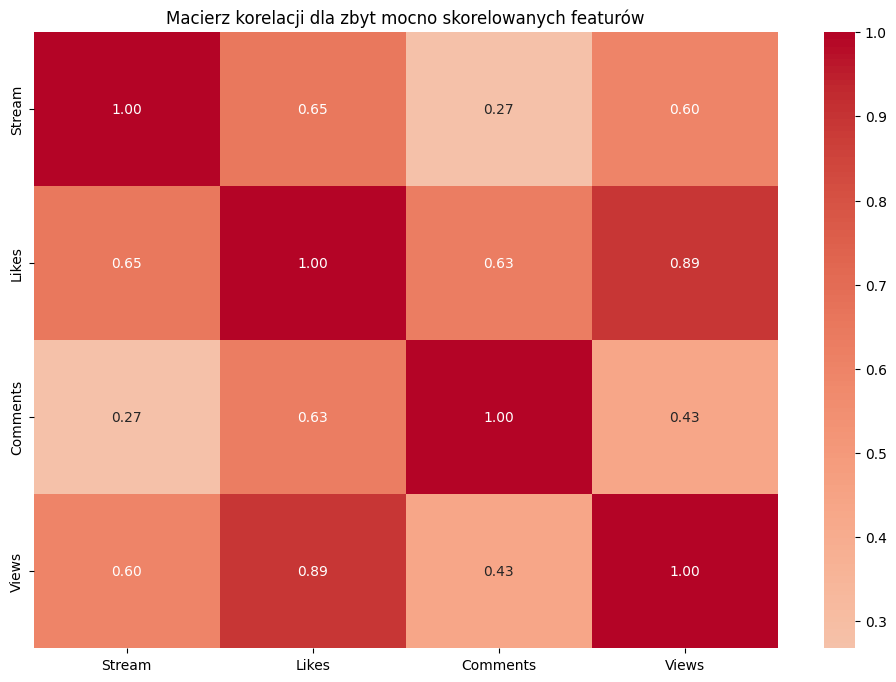

In [5]:
plt.figure(figsize=(12, 8)) 
sns.heatmap(df.loc[:,['Stream','Likes','Comments','Views']].corr(), annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Macierz korelacji dla zbyt mocno skorelowanych featurów")
plt.show()

In [6]:
df = df.drop(["Unnamed: 0", "Url_spotify", "Track", "Uri", "Url_youtube", "Channel", "Likes", "Comments", "Stream"], axis=1)

<span style="color: red">Unnamed: 0, Url_spotify, Uri, Url_youtube, Channel</span><br>
<span style="color: red">Likes, Comments, Stream</span>- za duży współczynnik korelacji i zbytnio ułatwiły by modelowi zadanie, a więc tak jak ustaliliśmy na zajęciach omawiających projekty takie featury zostają zdropowane.<br>
<span style="color: red">Track</span>- analizujemy wyświetlenia na youtube, a to tytuł na spotify 

<span style="color: teal">Artist</span> - weźmiemy po uwagę długość<br>
<span style="color: teal">Album</span> - weźmiemy po uwagę długość<br>
<span style="color: teal">Title</span> - weźmiemy po uwagę długość<br>
<span style="color: teal">Description</span> - weźmiemy po uwagę długość, NA uzupełnimy ""<br>

<span style="color: green">Album type</span><br>
<span style="color: green">Danceability - Duration_ms</span><br>
<span style="color: green">Views</span><br>
<span style="color: green">Licensed</span><br>
<span style="color: green">official_video</span>



In [7]:
df.shape

(20718, 19)

In [8]:
df.dtypes

Artist               object
Album                object
Album_type           object
Danceability        float64
Energy              float64
Key                 float64
Loudness            float64
Speechiness         float64
Acousticness        float64
Instrumentalness    float64
Liveness            float64
Valence             float64
Tempo               float64
Duration_ms         float64
Title                object
Views               float64
Description          object
Licensed             object
official_video       object
dtype: object

In [9]:
df = df.loc[~df["Views"].isna()]

Wrzucam wiersze dla których Views, czylu kolumna którą checemy przewidywać, nie ma wartości

In [10]:
print(df.isna().sum())
df[df["Key"].isna()]

Artist                0
Album                 0
Album_type            0
Danceability          1
Energy                1
Key                   1
Loudness              1
Speechiness           1
Acousticness          1
Instrumentalness      1
Liveness              1
Valence               1
Tempo                 1
Duration_ms           1
Title                 0
Views                 0
Description         406
Licensed              0
official_video        0
dtype: int64


,Artist,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Title,Views,Description,Licensed,official_video
11890,Natasha Bedingfield,Unwritten,album,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Natasha Bedingfield - These Words (Official Vi...,21655597.0,"Natasha Bedingfield - These Words (I Love You,...",True,True


Zostaje tylko 1 wiersz w którym nie ma wartości w kolumna od Danceability do Duration_ms. Ponieważ jest tylko 1 zostaje usunięty

In [11]:
df = df.loc[~df["Key"].isna()]
print(df.isna().sum())

Artist                0
Album                 0
Album_type            0
Danceability          0
Energy                0
Key                   0
Loudness              0
Speechiness           0
Acousticness          0
Instrumentalness      0
Liveness              0
Valence               0
Tempo                 0
Duration_ms           0
Title                 0
Views                 0
Description         406
Licensed              0
official_video        0
dtype: int64


brakujące wartości są tylko w description i zastąpimy je później medianą długości opisów innych utworów, poniewaz po sprawdzaniu okazało się że utworzy z NA w kolumnie z opisem w rzeczywistości mają niepusty opis.

In [12]:
any(df.loc[:,'Description']=='')

False

In [13]:
df.loc[df["Description"].isna(),'Description'] = ''

In [14]:
df[df.duplicated()]

,Artist,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Title,Views,Description,Licensed,official_video


nie ma duplikatów wierszy

In [15]:
print(df.nunique())

Artist               2063
Album               11727
Album_type              3
Danceability          897
Energy               1263
Key                    12
Loudness             9298
Speechiness          1296
Acousticness         3133
Instrumentalness     3989
Liveness             1525
Valence              1290
Tempo               14772
Duration_ms         14419
Title               18145
Views               19244
Description         17395
Licensed                2
official_video          2
dtype: int64


Album_type, Key, Licensed i official_video to prawdopodobnie wartości kategoryczne

In [16]:
display(df[["Album_type", "Key", "Licensed", "official_video"]])
print(df["Licensed"].unique())
print(df["Album_type"].unique())
print(df["Key"].unique())
print(df["official_video"].unique())

,Album_type,Key,Licensed,official_video
0,album,6.0,True,True
1,album,8.0,True,True
2,single,1.0,True,True
3,album,2.0,True,True
4,album,10.0,True,True
...,...,...,...,...
20713,single,5.0,True,True
20714,single,4.0,True,True
20715,single,4.0,True,True
20716,single,9.0,True,True


[True False]
['album' 'single' 'compilation']
[ 6.  8.  1.  2. 10. 11.  4.  9.  0.  7.  5.  3.]
[True False]


powyższe przypuszczenie jest potwierdzone, to faktycznie wartości kategoryczne

In [17]:
df["Licensed"] = df["Licensed"].astype('bool')
df["official_video"] = df["official_video"].astype('bool')
df.dtypes

Artist               object
Album                object
Album_type           object
Danceability        float64
Energy              float64
Key                 float64
Loudness            float64
Speechiness         float64
Acousticness        float64
Instrumentalness    float64
Liveness            float64
Valence             float64
Tempo               float64
Duration_ms         float64
Title                object
Views               float64
Description          object
Licensed               bool
official_video         bool
dtype: object

In [18]:
print(df.loc[df["Album_type"]== "compilation","Album"])
print(df.loc[df["Album_type"]== "single","Album"])

154      Listen Up! The Official 2010 FIFA World Cup Album
206                                              Only Hits
220                                          Greatest Hits
222                                          Greatest Hits
225                                          Greatest Hits
                               ...                        
19367                                   Poesia Acústica 13
19508                                      Hip Hop Moshpit
20462                                   Poesia Acústica 13
20521    Eurovision Song Contest Turin 2022 (Karaoke Ve...
20600                                   Poesia Acústica 13
Name: Album, Length: 769, dtype: object
2            New Gold (feat. Tame Impala and Bootie Brown)
6        New Gold (feat. Tame Impala and Bootie Brown) ...
8                        Cracker Island (feat. Thundercat)
29                                     Best Friend (Remix)
37                                              Lux Æterna
                

Album ma tytuł na dowolnego "typu albumu" nawet single i compilation

In [19]:
pearsonr(df["Licensed"].astype(int), df["official_video"].astype(int))

PearsonRResult(statistic=0.8162350292212046, pvalue=0.0)

Współczynnik korealacji między licensed a official_video jest bardzo wysoki jeden z tych feature'ów trzeba będzie wyrzucić

In [20]:
df["Artist_Length"] = df["Artist"].apply(len)
df["Album_Length"] = df["Album"].apply(len)
df["Title_Length"] = df["Title"].apply(len)
df["Description_Length"] = df["Description"].apply(len)
df.loc[df['Description_Length']==0,'Description_Length'] = df.loc[df['Description_Length']!=0, 'Description_Length'].median()
df["official_video"] = df["official_video"].astype(float)
df["Licensed"] = df["Licensed"].astype(float)

In [21]:
df = df.drop(["Artist", "Album", "Title", "Description"], axis=1)

In [22]:
df.dtypes

Album_type             object
Danceability          float64
Energy                float64
Key                   float64
Loudness              float64
Speechiness           float64
Acousticness          float64
Instrumentalness      float64
Liveness              float64
Valence               float64
Tempo                 float64
Duration_ms           float64
Views                 float64
Licensed              float64
official_video        float64
Artist_Length           int64
Album_Length            int64
Title_Length            int64
Description_Length      int64
dtype: object

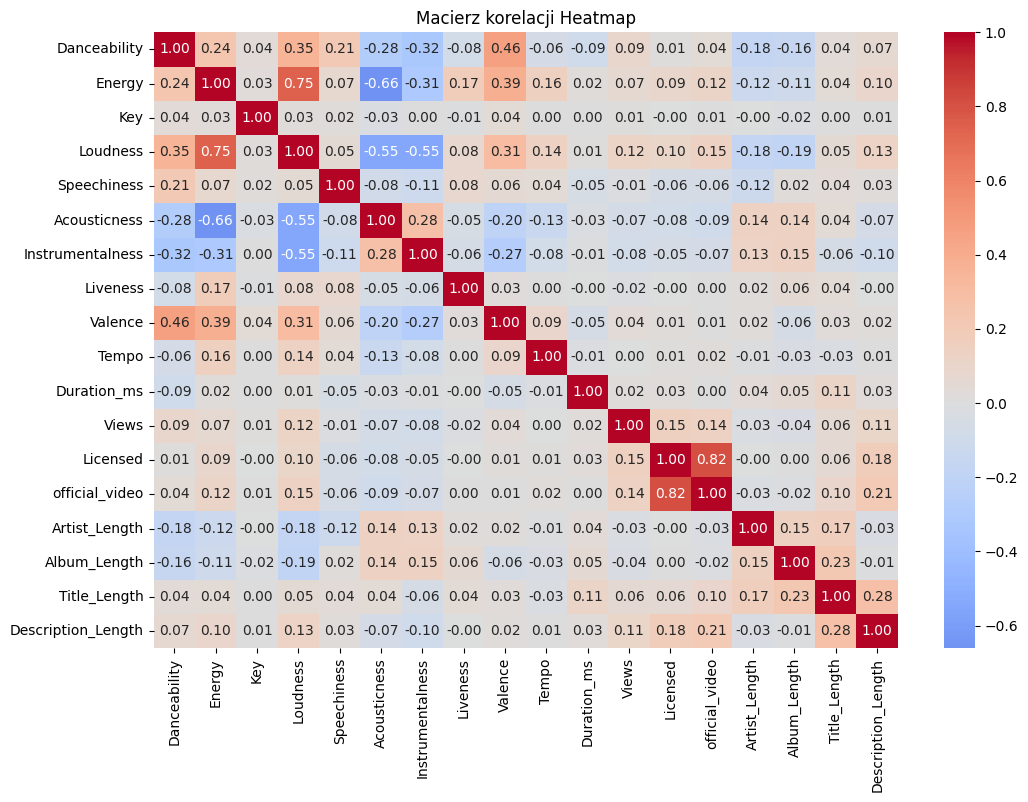

In [23]:
plt.figure(figsize=(12, 8)) 
sns.heatmap(df.select_dtypes(include=["int64","float64"]).corr(), annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Macierz korelacji Heatmap")
plt.show()

loundness ma wysokie współczynniki korelacji z kilkowa featuremi, może w przyszłości będziemy je dropować

In [24]:
df.columns

Index(['Album_type', 'Danceability', 'Energy', 'Key', 'Loudness',
       'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness',
       'Valence', 'Tempo', 'Duration_ms', 'Views', 'Licensed',
       'official_video', 'Artist_Length', 'Album_Length', 'Title_Length',
       'Description_Length'],
      dtype='object')

In [25]:
df.describe()

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Licensed,official_video,Artist_Length,Album_Length,Title_Length,Description_Length
count,20247.000000,20247.000000,20247.000000,20247.000000,20247.000000,20247.000000,20247.000000,20247.000000,20247.000000,20247.000000,2.024700e+04,2.024700e+04,20247.000000,20247.000000,20247.000000,20247.000000,20247.000000,20247.000000
mean,0.620204,0.634972,5.303502,-7.665131,0.096068,0.289146,0.056003,0.191554,0.529305,120.604138,2.248732e+05,9.394139e+07,0.698326,0.776510,10.880970,20.251889,49.986961,1117.027461
std,0.165262,0.213834,3.578103,4.616914,0.110200,0.286097,0.193219,0.165545,0.245654,29.582294,1.256048e+05,2.746506e+08,0.458996,0.416594,4.791613,14.449262,19.975064,1049.285449
min,0.000000,0.000020,0.000000,-46.251000,0.000000,0.000001,0.000000,0.014500,0.000000,0.000000,3.098500e+04,0.000000e+00,0.000000,0.000000,2.000000,1.000000,3.000000,1.000000
25%,0.519000,0.507500,2.000000,-8.833000,0.035600,0.043800,0.000000,0.094000,0.339000,97.002000,1.802725e+05,1.825713e+06,0.000000,1.000000,7.000000,10.000000,36.000000,321.000000
50%,0.638000,0.666000,5.000000,-6.540000,0.050500,0.190000,0.000003,0.125000,0.536000,119.964000,2.133730e+05,1.450110e+07,1.000000,1.000000,11.000000,16.000000,48.000000,749.000000
75%,0.741000,0.797000,8.000000,-4.939500,0.103000,0.472000,0.000484,0.234000,0.726000,139.931000,2.523665e+05,7.039975e+07,1.000000,1.000000,13.000000,26.500000,61.000000,1674.500000
max,0.975000,1.000000,11.000000,0.920000,0.964000,0.996000,1.000000,1.000000,0.993000,243.372000,4.676058e+06,8.079649e+09,1.000000,1.000000,45.000000,195.000000,188.000000,4999.000000


[[<Axes: title={'center': 'Danceability'}>
  <Axes: title={'center': 'Energy'}> <Axes: title={'center': 'Key'}>
  <Axes: title={'center': 'Loudness'}>]
 [<Axes: title={'center': 'Speechiness'}>
  <Axes: title={'center': 'Acousticness'}>
  <Axes: title={'center': 'Instrumentalness'}>
  <Axes: title={'center': 'Liveness'}>]
 [<Axes: title={'center': 'Valence'}> <Axes: title={'center': 'Tempo'}>
  <Axes: title={'center': 'Duration_ms'}>
  <Axes: title={'center': 'Views'}>]
 [<Axes: title={'center': 'Licensed'}>
  <Axes: title={'center': 'official_video'}>
  <Axes: title={'center': 'Artist_Length'}>
  <Axes: title={'center': 'Album_Length'}>]
 [<Axes: title={'center': 'Title_Length'}>
  <Axes: title={'center': 'Description_Length'}> <Axes: > <Axes: >]]


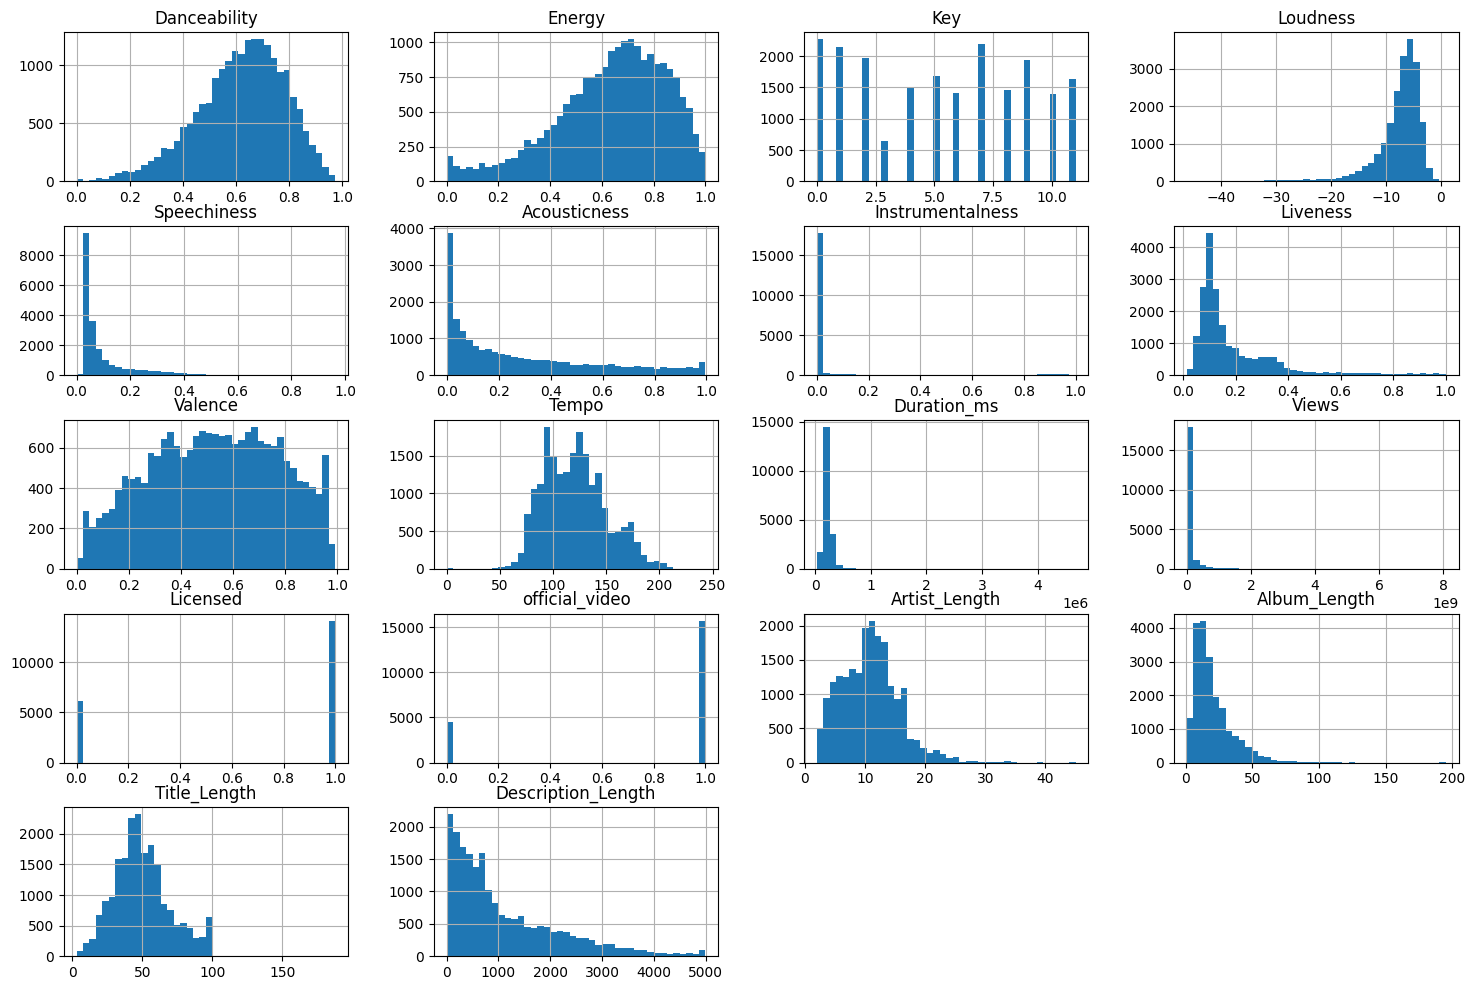

In [26]:
print(df.hist(bins = 40, figsize=(18, 12)))

instrumentalness jako zmienna kategoryczna?

In [27]:
sum(df["Views"]==0)
df = df.loc[df["Views"]!=0,:]

In [28]:
cols_for_box = ["Loudness", "Duration_ms"]
 
fig_views = px.box(df ,x = "Views", title = "log10(Views) ")
fig_views.update_layout(xaxis_type="log" )  
fig_views.show()


print(f'Number of rows with non zero Instrumentalness: {sum(df["Instrumentalness"]!=0)}')
print(f'Number of rows with zero Instrumentalness: {sum(df["Instrumentalness"]==0)}')
fig_ins = px.box(x = np.log10(df.loc[df["Instrumentalness"]!=0, "Instrumentalness"]),title = "log10(Instrumentalness) of non zero Instrumentalness").show()

for col in cols_for_box:
    px.box(df, x=col, title = col).show()
 

Number of rows with non zero Instrumentalness: 11119
Number of rows with zero Instrumentalness: 9127


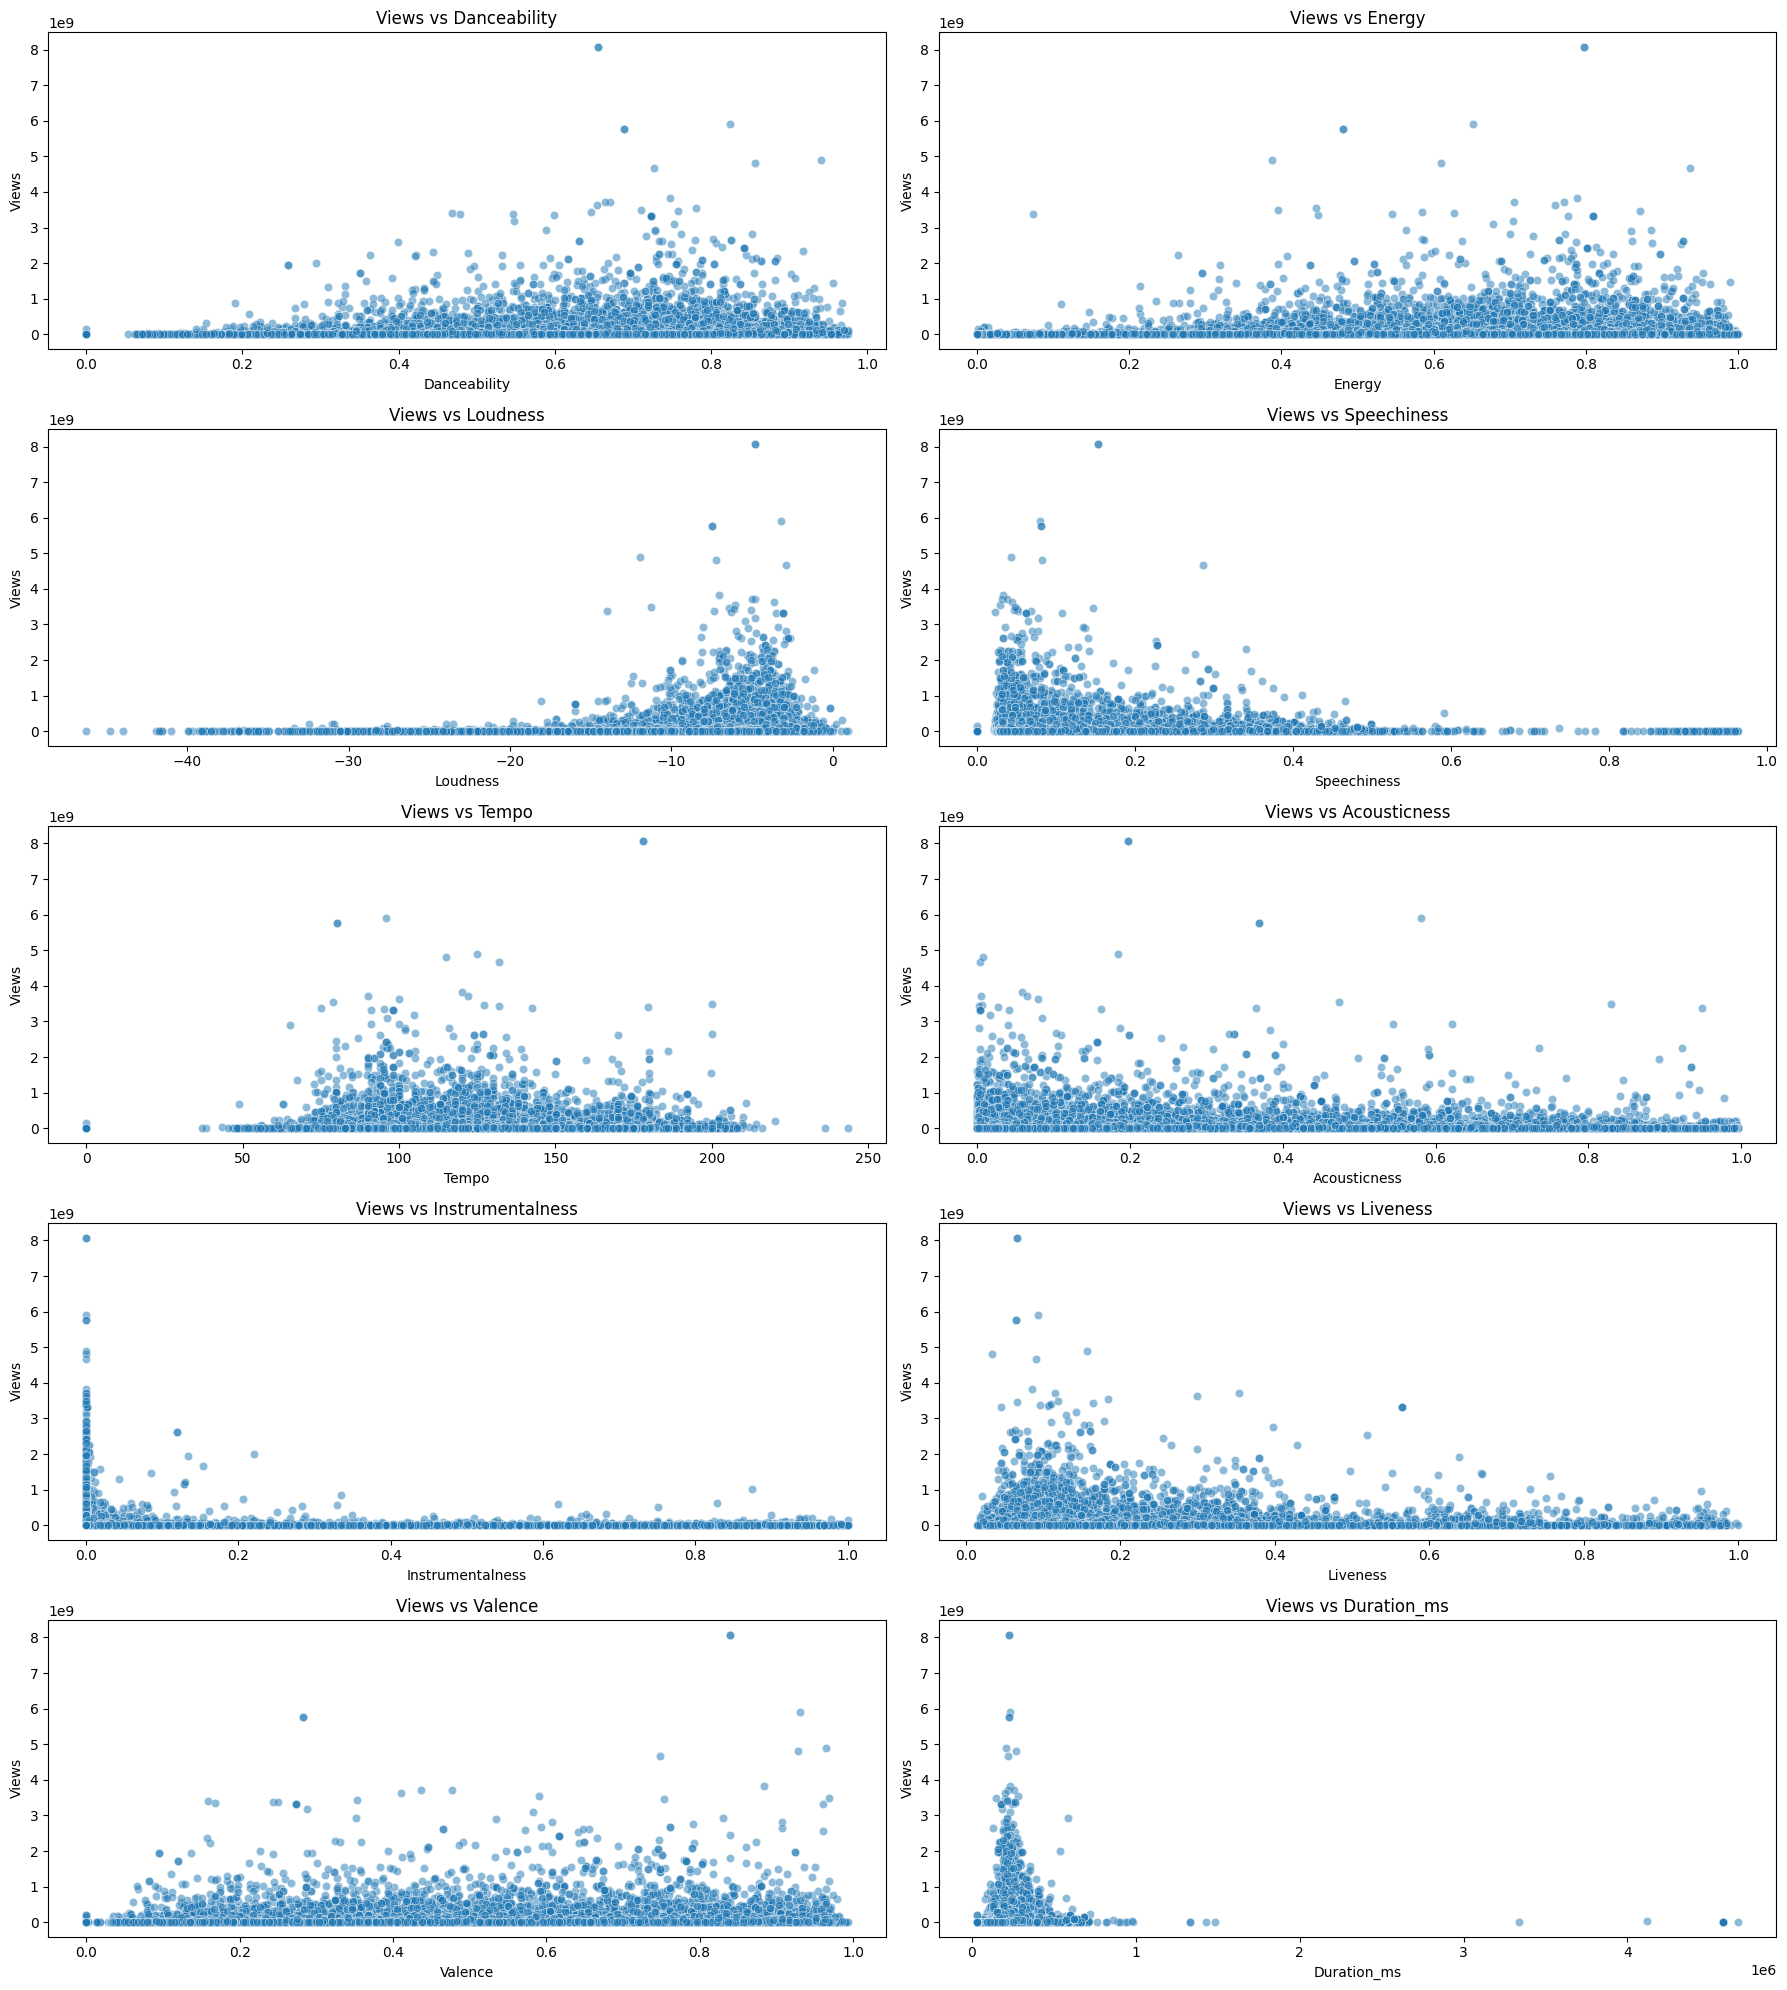

In [29]:


selected_columns = ["Danceability", "Energy", "Loudness", "Speechiness", "Tempo", "Acousticness","Instrumentalness","Liveness","Valence","Duration_ms"]

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(18, 20))


axes = axes.flatten()  

for col, ax in zip(selected_columns, axes):
    sns.scatterplot(data=df, x=col, y="Views", ax=ax, alpha=0.5)
    ax.set_title(f"Views vs {col}")

plt.tight_layout()
plt.show()


In [30]:
df.to_csv(r".\data\after_eda.csv",index=False) 